# **Phoneme Visualization** : Time Series, Spectrogram, DFT Magnitude Spectrum Representations

## Import Required Libraries

In [1]:
import os
import numpy as np
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

## Set path for Phoneme Data

In [2]:
cwd = os.getcwd()
dataset_path = cwd + '\Phoneme Data'

## Listing the Available Phoneme

In [3]:
# Get all phoneme file names(saved by phoneme name)
audio_files = os.listdir(dataset_path)
# Create a list specifying all available phonemes in the dataset
phoneme_list = [x.split('.')[0] for x in audio_files]

In [4]:
print(phoneme_list)

['AA', 'AE', 'AH', 'AO', 'AW', 'AX', 'AXR', 'AY', 'EH', 'ER', 'EY', 'IH', 'IX', 'IY', 'OW', 'OY', 'UH', 'UW']


## Analysis for Single Phoneme

In [5]:
# Set phoneme that needs to be analyzed
current_phoneme = 'AA'
# Set .wav file path for the current phoneme
phoneme_file_path = dataset_path + '/' + current_phoneme + '.wav'

In [6]:
# Extract values from .wav file into an array
fs, samples = wavfile.read(phoneme_file_path)
num_samples = samples.shape[0]  # Number of samples

#### Time Series Representation

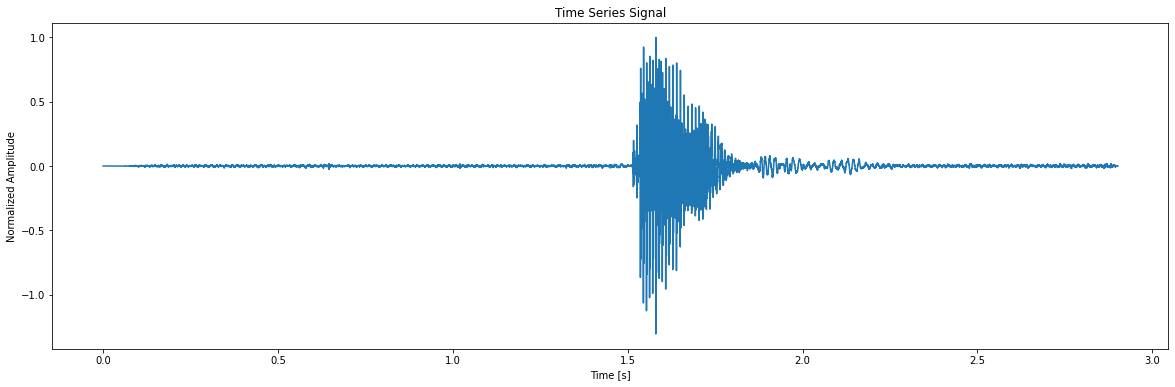

In [7]:
end_time = num_samples / fs  # Total time of signal
time = np.linspace(0., end_time, samples.shape[0])
plt.plot(time, samples/(max(samples)))
plt.gcf().set_size_inches(20,6)
plt.xlabel("Time [s]")
plt.ylabel("Normalized Amplitude")
plt.title("Time Series Signal")
plt.show()

#### Spectrogram

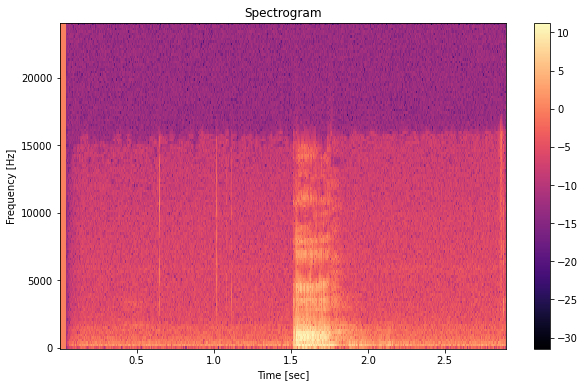

In [8]:
frequencies, time, spectrogram = signal.spectrogram(samples, fs)  # Compute Spectrogram coeffs
spectrogram = spectrogram+(spectrogram==0)  # spectrogram+(spectrogram==0) is used to avoid warning due to zero values while taking log
plt.pcolormesh(time, frequencies, np.log(spectrogram), cmap='magma')  
plt.gcf().set_size_inches(10,6)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram")
plt.colorbar()
plt.show()

#### DFT Maginitude Spectrum

In [9]:
#Compute DFT of the phoneme sample
signalf = fft(samples)
signalf_shift = np.fft.fftshift(signalf)  # Need to shift the spectral values to center 'signalf' around 0 Hz
frequencies = np.fft.fftfreq(num_samples, 1/fs)  # Frequencies present in DFT
frequencies_shift = np.fft.fftshift(frequencies)  # Need to shift frequencies to center 0 Hz

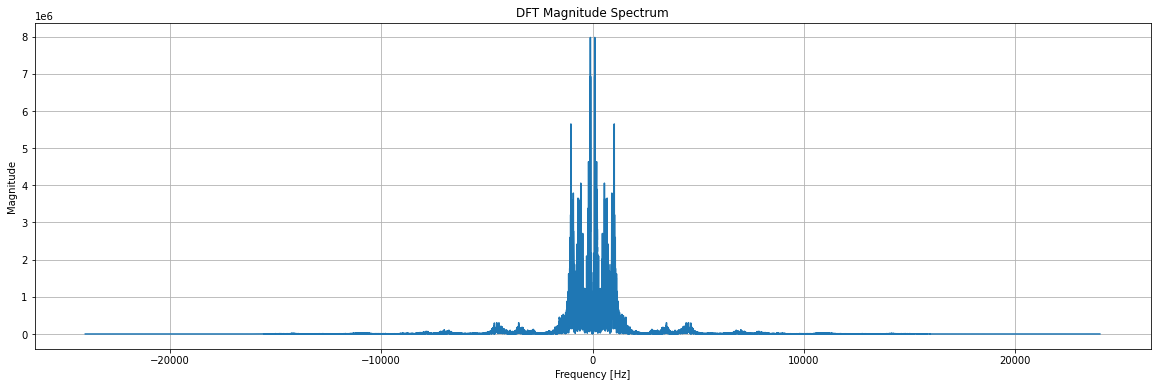

In [10]:
plt.plot(frequencies_shift, np.abs(signalf_shift))
plt.gcf().set_size_inches(20,6)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("DFT Magnitude Spectrum")
plt.grid()
plt.show()

## Comparing Phonemes Plots

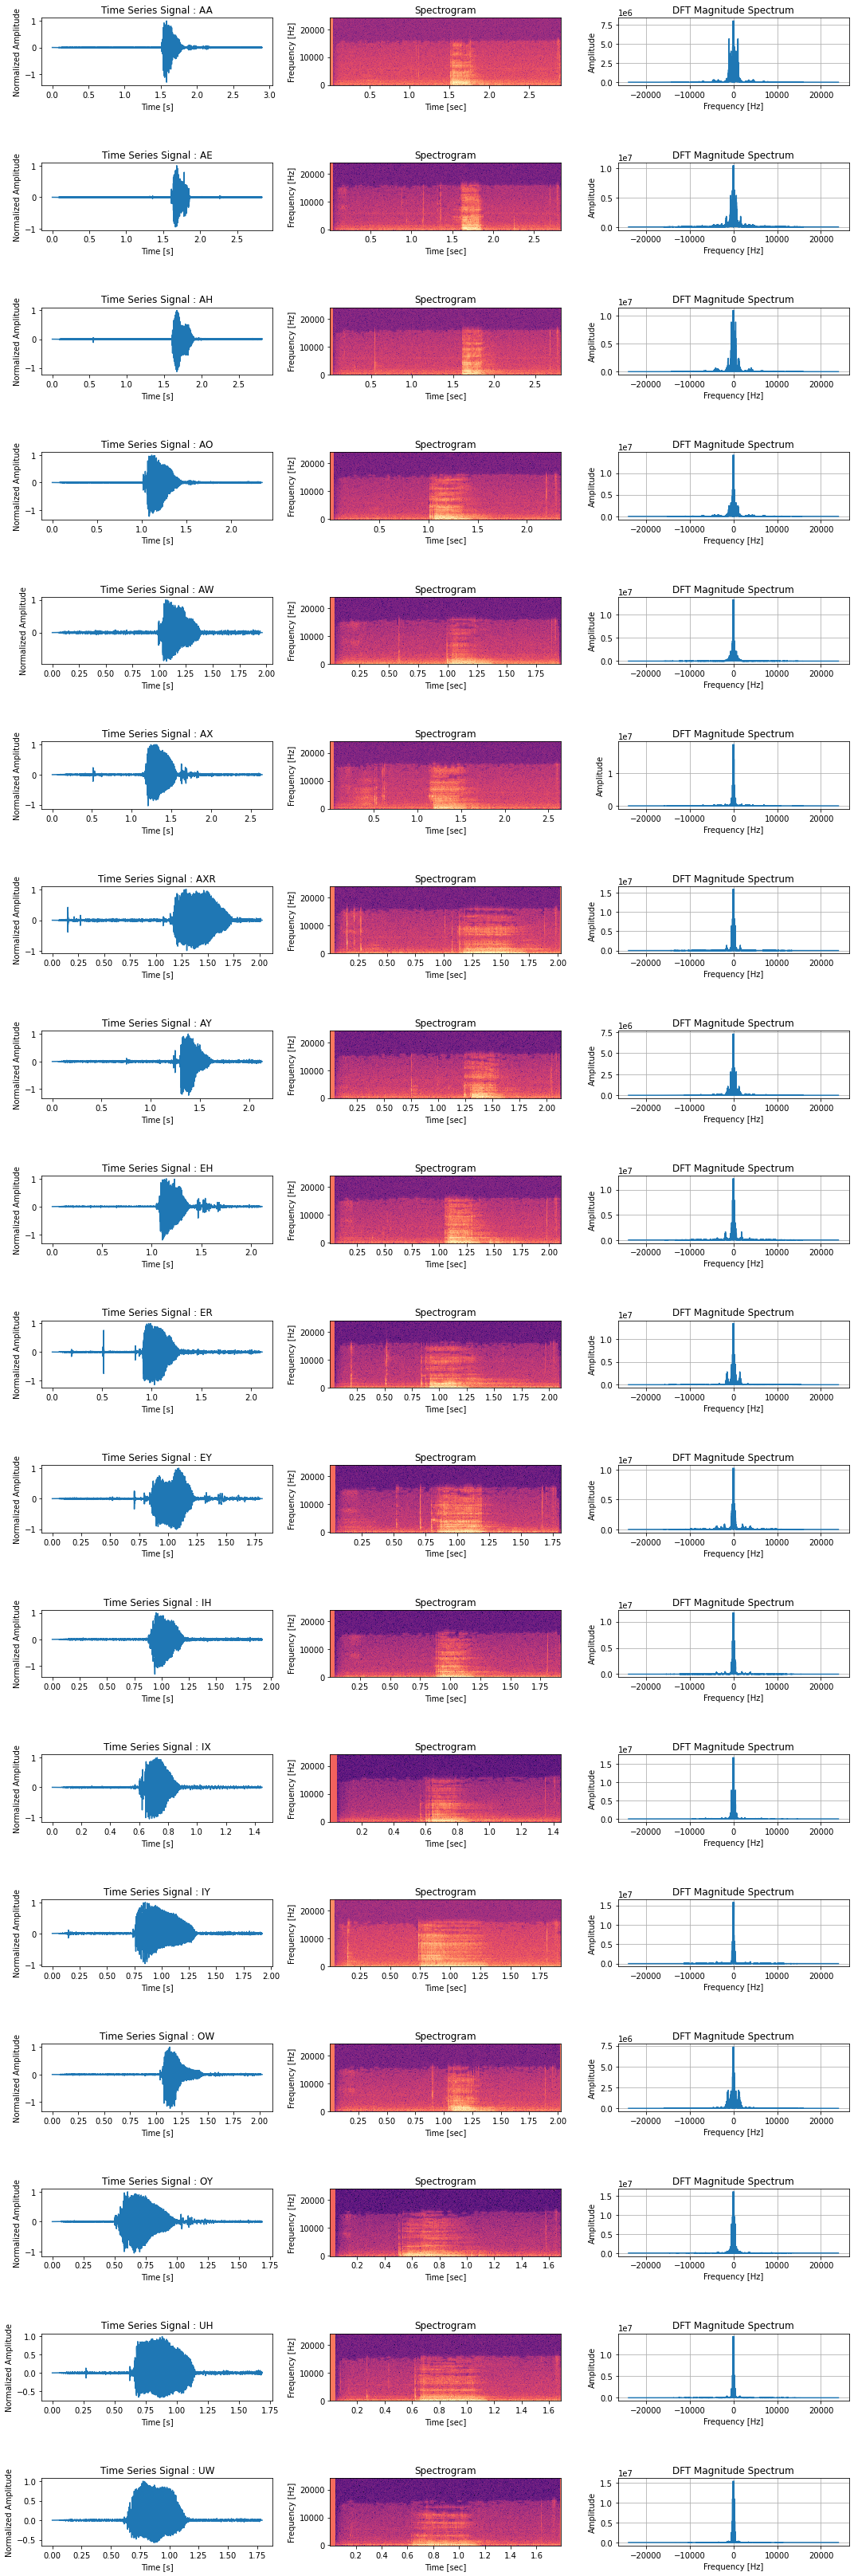

In [11]:
fig, ax = plt.subplots(len(phoneme_list), 3, figsize = (15,45))
# Plots for comparing phonemes
for i in range(0,len(phoneme_list)):
    # Set .wav file path
    current_phoneme = phoneme_list[i]
    phoneme_file_path = dataset_path + '/' + current_phoneme + '.wav'
    # Load .wav files into an array
    fs, samples = wavfile.read(phoneme_file_path)
    num_samples = samples.shape[0]
    # Plot for time series representation
    end_time = num_samples / fs
    time = np.linspace(0., end_time, samples.shape[0])
    ax[i,0].plot(time, samples/(max(samples)))
    ax[i,0].set_xlabel("Time [s]")
    ax[i,0].set_ylabel("Normalized Amplitude")
    ax[i,0].set_title("Time Series Signal : " + current_phoneme)
    # Plot spectrogram
    frequencies, time, spectrogram = signal.spectrogram(samples, fs)
    ax[i,1].pcolormesh(time, frequencies, np.log(spectrogram+(spectrogram==0)), cmap='magma')  
    ax[i,1].set_ylabel('Frequency [Hz]')
    ax[i,1].set_xlabel('Time [sec]')
    ax[i,1].set_title("Spectrogram")
    # Compute DFT and perform fftshift
    signalf = fft(samples)
    signalf_shift = np.fft.fftshift(signalf)
    frequencies = np.fft.fftfreq(num_samples, 1/fs)
    frequencies_shift = np.fft.fftshift(frequencies)
    # Plot DFT Magnitude Spectrum
    ax[i,2].plot(frequencies_shift, np.abs(signalf_shift))
    ax[i,2].set_xlabel("Frequency [Hz]")
    ax[i,2].set_ylabel("Amplitude")
    ax[i,2].set_title("DFT Magnitude Spectrum")
    ax[i,2].grid()
plt.tight_layout(h_pad=5)
plt.show()